In [ ]:
# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-19-d4590028787e>:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


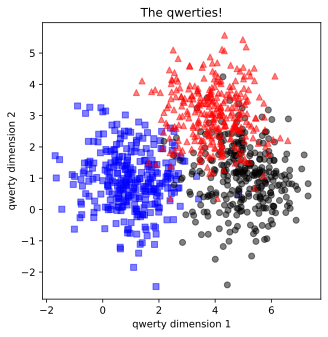

In [ ]:
# create data

nPerClust = 300
blur = 1

A = [ 1, 1 ]
B = [ 5, 1 ]
C = [ 4, 3 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.hstack((  np.zeros((nPerClust)),
                         np.ones( (nPerClust)),
                       1+np.ones( (nPerClust))  ))

# concatanate into a matrix
data_np = np.hstack((a,b,c)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).long() # note: "long" format for CCE

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs',alpha=.5)
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko',alpha=.5)
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^',alpha=.5)
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [ ]:
data.shape

torch.Size([900, 2])

In [ ]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(data, labels, test_size=.1)

# then convert them into PyTorch Datasets (note: already converted to tensors)
train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)

# finally, translate into dataloader objects
batchsize    = 16
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [ ]:
class QwertyModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.input = nn.Linear(2, 16)
        self.batchNorm1 = nn.BatchNorm1d(16)

        self.hidden1 = nn.Linear(16, 16)
        self.batchNorm2 = nn.BatchNorm1d(16)

        self.output = nn.Linear(16, 3)


    def forward(self, x):
        x = self.input(x)
        x = self.batchNorm1(x)
        x = F.relu(x)

        x = self.hidden1(x)
        x = self.batchNorm2(x)
        x = F.relu(x)

        x = self.output(x)

        return x

In [ ]:
sampleModel = QwertyModel()
sample = torch.randn(5, 2)
sampleModel(sample)

tensor([[ 0.1638,  0.2857, -0.5234],
        [-0.5117,  0.1661, -0.1996],
        [-0.2657,  0.1561,  0.1586],
        [-0.0497, -0.1586, -0.1594],
        [ 0.0778,  0.0720, -0.0684]], grad_fn=<AddmmBackward0>)

In [ ]:
def createModel(model, optimizerAlg, lr:float=.01, L2Reg=0):
    criterion = nn.CrossEntropyLoss()

    optFunc = getattr(torch.optim, optimizerAlg)
    optimizer = optFunc(model.parameters(), lr=lr, weight_decay=L2Reg)

    return model, criterion, optimizer

In [ ]:
def trainModel(epochs, trainLoader, testLoader, model, criterion, optimizer):
    losses = []
    trainAccs = []
    valAccs = []

    for i in range(epochs):

        batchLosses = []
        batchAccs = []
        for X, y in trainLoader:
            # calc loss
            y_pred = model(X)
            loss = criterion(y_pred, y)

            # backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # calc acc
            acc = 100 * torch.mean((torch.argmax(y_pred, axis=1) == y).float())

            # add results into list for each batches.
            batchLosses.append(loss)
            batchAccs.append(acc)

        # get the mean of results in each batches and store in lists.
        batchLosses = torch.tensor(batchLosses).float()
        batchAccs = torch.tensor(batchAccs).float()

        losses.append(torch.mean(batchLosses))
        trainAccs.append(torch.mean(batchAccs))

        # get the test accs
        X, y = next(iter(testLoader))
        y_pred = model(X)
        acc = 100 * torch.mean((torch.argmax(y_pred, axis=1) == y).float())

        valAccs.append(acc)


    return losses, trainAccs, valAccs

In [ ]:
model = QwertyModel()
model, criterion, optimizer = createModel(model, "SGD")
losses, trainAccs, valAccs = trainModel(5, train_loader, test_loader, model, criterion, optimizer)

In [ ]:
trainAccs

[tensor(66.), tensor(84.5000), tensor(84.8750), tensor(85.2500), tensor(85.)]

In [ ]:
model = QwertyModel()
optFunctions = ["SGD", "RMSprop", "Adam"]
learningRates = np.linspace(0, 0.1, 21)
epochs = 5

def getResultsByLrAndOpt(model):
    optimizerF = np.zeros((len(optFunctions), len(learningRates), 3, epochs))

    for i, optFunc in enumerate(optFunctions):
        for j, lr in enumerate(learningRates):
            model, criterion, optimizer = createModel(model, optFunc, lr)
            lossesByLr, trainAccsByLr, valAccsByLr = trainModel(epochs, train_loader, test_loader, model, criterion, optimizer)
            optimizerF[i, j, 0, :] = lossesByLr
            optimizerF[i, j, 1, :] = trainAccsByLr
            optimizerF[i, j, 2, :] = valAccsByLr

    return optimizerF

results = getResultsByLrAndOpt(model)

In [ ]:
results.shape

(3, 21, 3, 5)

In [ ]:
range(results.shape[-1])

range(0, 5)

In [ ]:
results[0,:,0,:].shape

(21, 5)

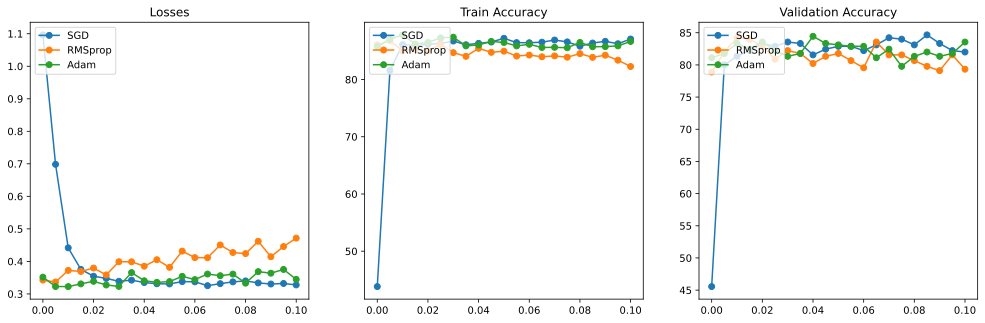

In [ ]:
fig = plt.figure(figsize=(17, 5))
axs = fig.subplots(1, 3)
x = range(10)

# Plot Losses
axs[0].plot(learningRates, np.mean(results[0,:,0,-10:], axis=1), "o-")
axs[0].plot(learningRates, np.mean(results[1,:,0,-10:], axis=1), "o-")
axs[0].plot(learningRates, np.mean(results[2,:,0,-10:], axis=1), "o-")

axs[1].plot(learningRates, np.mean(results[0,:,1,-10:], axis=1), "o-")
axs[1].plot(learningRates, np.mean(results[1,:,1,-10:], axis=1), "o-")
axs[1].plot(learningRates, np.mean(results[2,:,1,-10:], axis=1), "o-")

axs[2].plot(learningRates, np.mean(results[0,:,2,-10:], axis=1), "o-")
axs[2].plot(learningRates, np.mean(results[1,:,2,-10:], axis=1), "o-")
axs[2].plot(learningRates, np.mean(results[2,:,2,-10:], axis=1), "o-")

axs[0].set_title("Losses")
axs[1].set_title("Train Accuracy")
axs[2].set_title("Validation Accuracy")

for j in range(3):
        legend = axs[j].legend(optFunctions, loc=2)

In [ ]:
model = QwertyModel()
optFunctions = ["SGD", "RMSprop", "Adam"]
L2Rates = np.linspace(0.0, 0.1, 6)
epochs = 1000


lossesByL2s = []
trainAccsByL2s = []
valAccsByL2s = []

for i, L2R in enumerate(L2Rates):
    model, criterion, optimizer = createModel(model, "Adam", L2Reg=L2R)
    lossesByLr, trainAccsByLr, valAccsByLr = trainModel(epochs, train_loader, test_loader, model, criterion, optimizer)

    lossesByL2s.append(lossesByLr)
    trainAccsByL2s.append(trainAccsByLr)
    valAccsByL2s.append(valAccsByLr)

In [ ]:
lossesByL2s_arr = np.array(lossesByL2s)
trainAccsByL2s_arr = np.array(trainAccsByL2s)
valAccsByL2s_arr = np.array(valAccsByL2s)

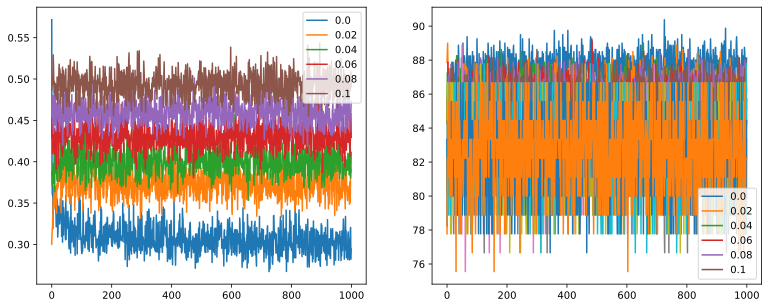

In [ ]:
fig = plt.figure(figsize=(13, 5))

axs = fig.subplots(1, 2)

axs[0].plot(range(epochs), lossesByL2s_arr.T)
axs[1].plot(range(epochs), trainAccsByL2s_arr.T)
axs[1].plot(range(epochs), valAccsByL2s_arr.T)

for i in range(2):
    axs[i].legend(L2Rates)


In [ ]:
trainAccsByL2s.shape